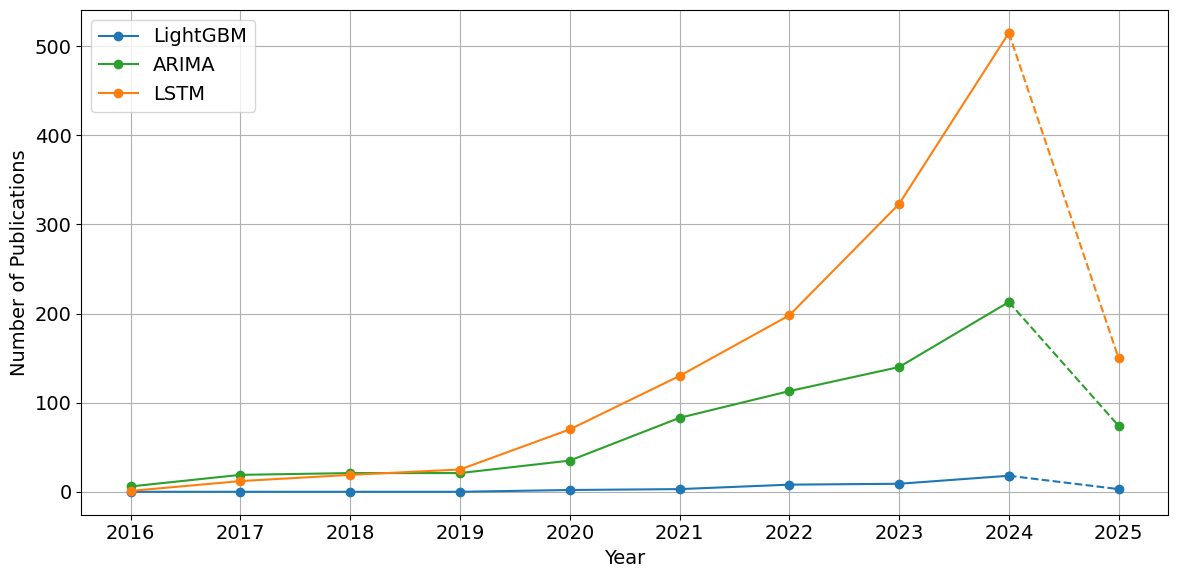

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Load CSV files
lgbm_df = pd.read_csv('LGBM.csv')
arima_df = pd.read_csv('ARIMA.csv')
lstm_df = pd.read_csv('LSTM.csv')

# Rename for consistency
lgbm_df.rename(columns={'Category': 'Year', 'Publications (total)': 'LightGBM'}, inplace=True)
arima_df.rename(columns={'Category': 'Year', 'Publications (total)': 'ARIMA'}, inplace=True)
lstm_df.rename(columns={'Category': 'Year', 'Publications (total)': 'LSTM'}, inplace=True)

# Merge all
df = lgbm_df.merge(arima_df, on='Year').merge(lstm_df, on='Year')
df['Year'] = df['Year'].astype(int)

# Split into solid and dashed
solid = df[df['Year'] < 2025]
dashed = df[df['Year'] >= 2024]

# Assign consistent colors
colors = {
    'LightGBM': 'tab:blue',
    'ARIMA': 'tab:green',
    'LSTM': 'tab:orange'
}

# Plotting
plt.figure(figsize=(12, 6))

# LightGBM
plt.plot(solid['Year'], solid['LightGBM'], color=colors['LightGBM'], marker='o', linestyle='-', label='LightGBM')
plt.plot(dashed['Year'], dashed['LightGBM'], color=colors['LightGBM'], marker='o', linestyle='--')

# ARIMA
plt.plot(solid['Year'], solid['ARIMA'], color=colors['ARIMA'], marker='o', linestyle='-', label='ARIMA')
plt.plot(dashed['Year'], dashed['ARIMA'], color=colors['ARIMA'], marker='o', linestyle='--')

# LSTM
plt.plot(solid['Year'], solid['LSTM'], color=colors['LSTM'], marker='o', linestyle='-', label='LSTM')
plt.plot(dashed['Year'], dashed['LSTM'], color=colors['LSTM'], marker='o', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.legend()
plt.grid(True)
plt.xticks(df['Year'])
plt.tight_layout()
plt.savefig("publications.png", dpi = 300)
plt.show()


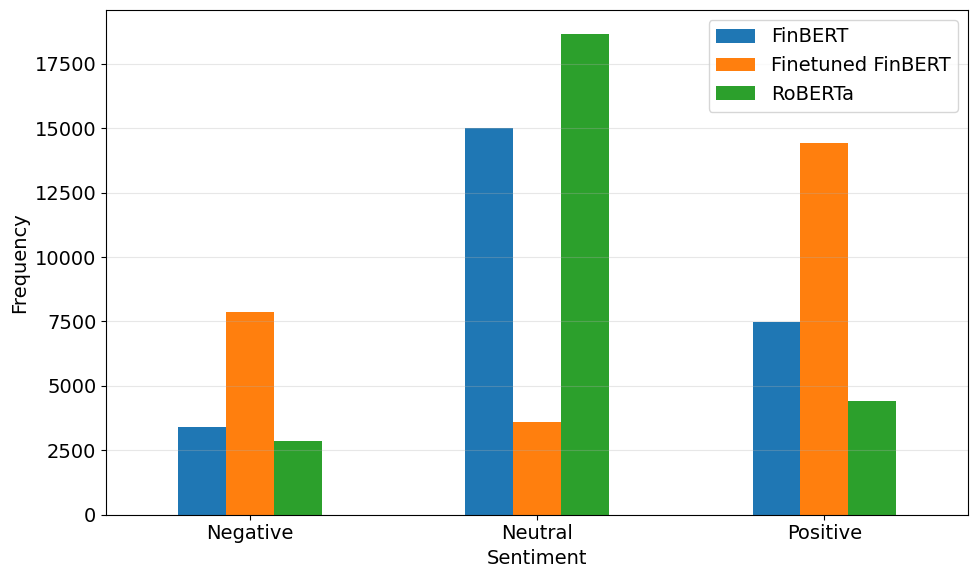

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})  # Change 14 to any size you prefer

# Load the CSV files
finbert_df = pd.read_csv('finbert_sentiment_final.csv')
finetuned_df = pd.read_csv('finetuned_finbert_sentiment.csv')
roberta_df = pd.read_csv('roberta_sentiment_final.csv')

# Count sentiment label frequencies
finbert_counts = finbert_df['finbert_sentiment_label'].value_counts().sort_index()
finetuned_counts = finetuned_df['finetuned_sentiment_label'].value_counts().sort_index()
roberta_counts = roberta_df['roberta_sentiment'].value_counts().sort_index()

# Combine into a DataFrame for plotting
sentiment_df = pd.DataFrame({
    'FinBERT': finbert_counts,
    'Finetuned FinBERT': finetuned_counts,
    'RoBERTa': roberta_counts
}).fillna(0).astype(int)

# Rename sentiment labels
sentiment_df.index = sentiment_df.index.map({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})

# Plotting
sentiment_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.grid(axis='y', alpha=0.3)  # Set alpha to make gridlines more transparent
plt.tight_layout()
plt.savefig("sentiment_scores.png", dpi = 300)
plt.show()


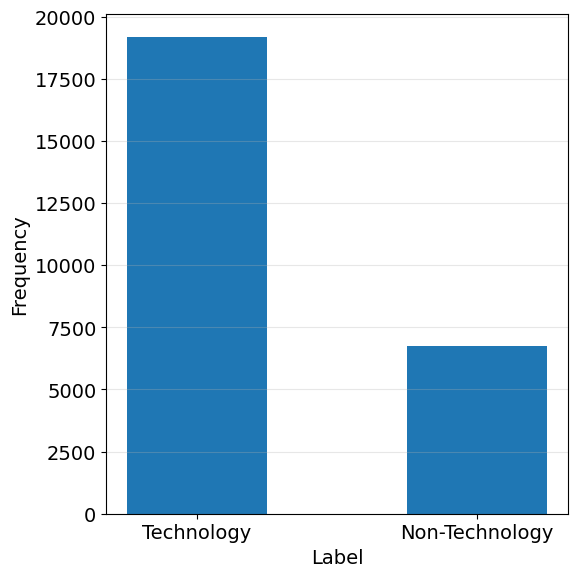

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

# Load the dataset
df = pd.read_csv('classified_documents_final.csv')

# Count the number of Technology vs Non-Technology labels
label_counts = df['Predicted_Label'].value_counts()

# Create a bar chart
plt.figure(figsize=(6, 6))
plt.bar(label_counts.index, label_counts.values, width=0.5)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.grid(axis='y', alpha=0.3)  # Set alpha to make gridlines more transparent
plt.tight_layout()
plt.savefig("tech_vs_non-tech.png", dpi = 300)
plt.show()


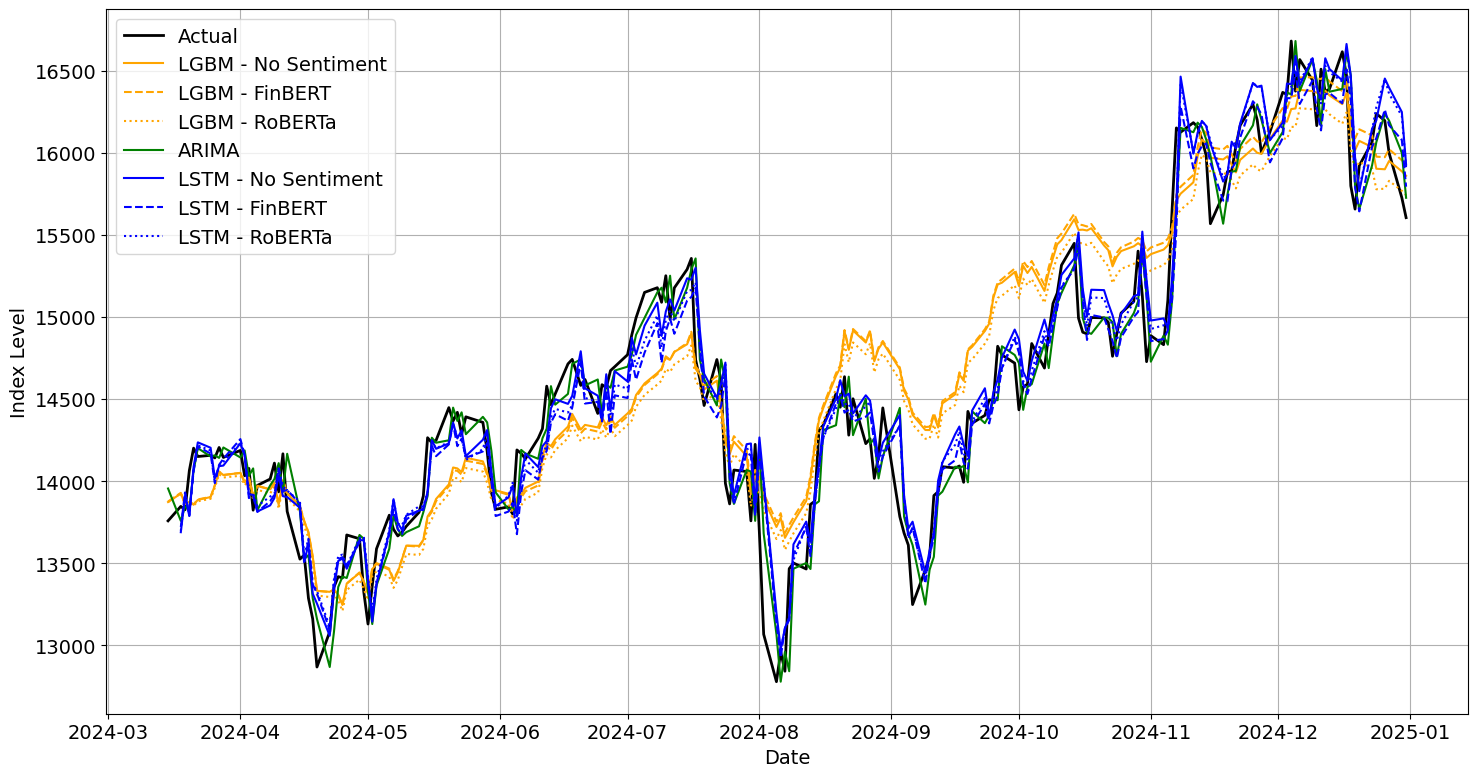

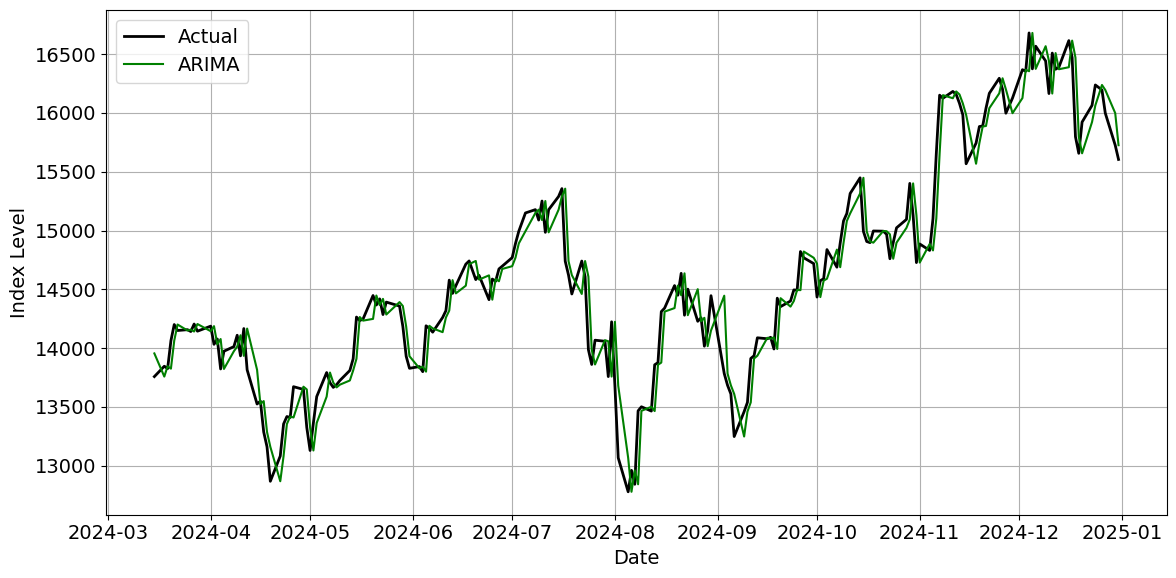

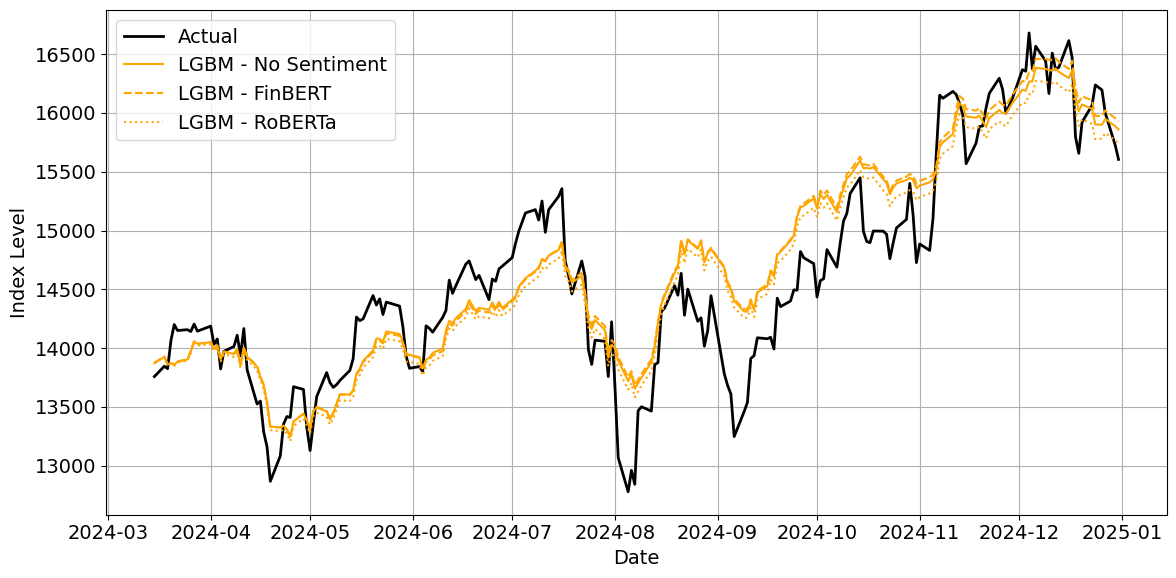

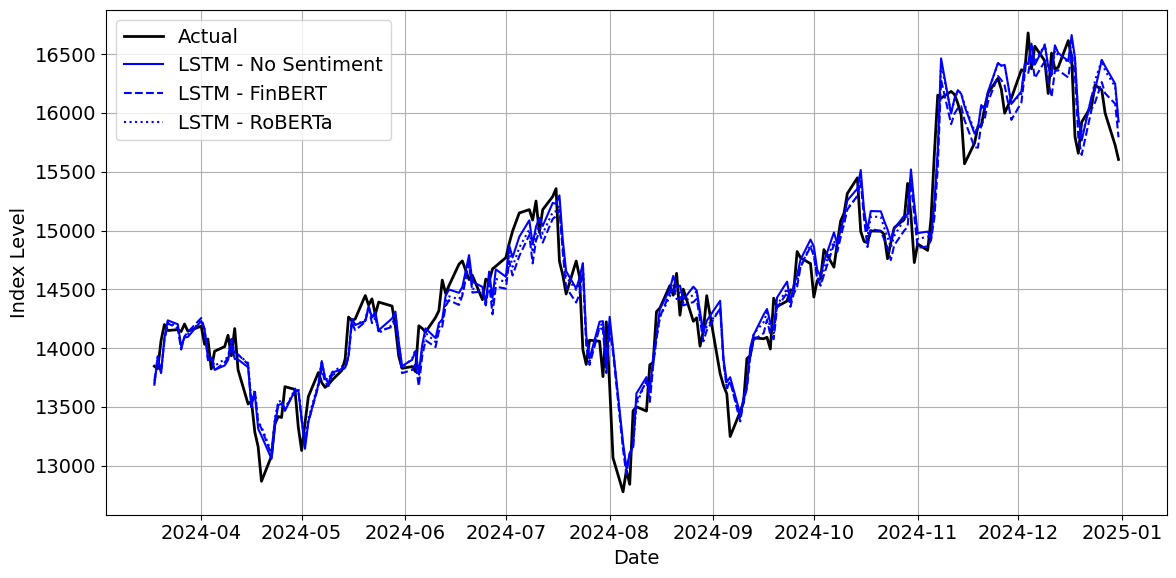

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
# Load your CSVs
lgbm_no_sent = pd.read_csv("lgbm_index_actual_vs_predicted_no_sentiment.csv")
lgbm_finbert = pd.read_csv("lgbm_index_actual_vs_predicted_finbert.csv")
lgbm_roberta = pd.read_csv("lgbm_index_actual_vs_predicted_roberta.csv")
arima = pd.read_csv("arima_index_price_predictions.csv")
lstm_no_sent = pd.read_csv("lstm_predicted_vs_actual_index.csv")
lstm_finbert = pd.read_csv("lstm_with_finbert_index.csv")
lstm_roberta = pd.read_csv("lstm_with_roberta_index.csv")

# Rename and convert for consistency
for df in [lgbm_no_sent, lgbm_finbert, lgbm_roberta, lstm_no_sent, lstm_finbert, lstm_roberta]:
    df.rename(columns={"Date": "date", "Index_Level": "actual", "Predicted_Index_Level": "predicted"}, inplace=True)
    df["date"] = pd.to_datetime(df["date"])

arima.rename(columns={"Date": "date", "Actual": "actual", "Predicted": "predicted"}, inplace=True)
arima["date"] = pd.to_datetime(arima["date"])

# === Plot: All Models ===
plt.figure(figsize=(15, 8))

# Actual
plt.plot(lgbm_no_sent["date"], lgbm_no_sent["actual"], label="Actual", color='black', linewidth=2)

# LGBM
plt.plot(lgbm_no_sent["date"], lgbm_no_sent["predicted"], label="LGBM - No Sentiment", linestyle='-', color='orange')
plt.plot(lgbm_finbert["date"], lgbm_finbert["predicted"], label="LGBM - FinBERT", linestyle='--', color='orange')
plt.plot(lgbm_roberta["date"], lgbm_roberta["predicted"], label="LGBM - RoBERTa", linestyle=':', color='orange')

# ARIMA (original green)
plt.plot(arima["date"], arima["predicted"], label="ARIMA", linestyle='-', color='green')

# LSTM
plt.plot(lstm_no_sent["date"], lstm_no_sent["predicted"], label="LSTM - No Sentiment", linestyle='-', color='blue')
plt.plot(lstm_finbert["date"], lstm_finbert["predicted"], label="LSTM - FinBERT", linestyle='--', color='blue')
plt.plot(lstm_roberta["date"], lstm_roberta["predicted"], label="LSTM - RoBERTa", linestyle=':', color='blue')

plt.xlabel("Date")
plt.ylabel("Index Level")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("all_experiment_1", dpi = 300)
plt.show()

# === Plot: ARIMA Only ===
plt.figure(figsize=(12, 6))
plt.plot(arima["date"], arima["actual"], label="Actual", color='black', linewidth=2)
plt.plot(arima["date"], arima["predicted"], label="ARIMA", linestyle='-', color='green')
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("arima_experiment_1", dpi = 300)
plt.show()

# === Plot: LGBM Only ===
plt.figure(figsize=(12, 6))
plt.plot(lgbm_no_sent["date"], lgbm_no_sent["actual"], label="Actual", color='black', linewidth=2)
plt.plot(lgbm_no_sent["date"], lgbm_no_sent["predicted"], label="LGBM - No Sentiment", linestyle='-', color='orange')
plt.plot(lgbm_finbert["date"], lgbm_finbert["predicted"], label="LGBM - FinBERT", linestyle='--', color='orange')
plt.plot(lgbm_roberta["date"], lgbm_roberta["predicted"], label="LGBM - RoBERTa", linestyle=':', color='orange')
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("lgbm_experiment_1", dpi = 300)
plt.show()

# === Plot: LSTM Only ===
plt.figure(figsize=(12, 6))
plt.plot(lstm_no_sent["date"], lstm_no_sent["actual"], label="Actual", color='black', linewidth=2)
plt.plot(lstm_no_sent["date"], lstm_no_sent["predicted"], label="LSTM - No Sentiment", linestyle='-', color='blue')
plt.plot(lstm_finbert["date"], lstm_finbert["predicted"], label="LSTM - FinBERT", linestyle='--', color='blue')
plt.plot(lstm_roberta["date"], lstm_roberta["predicted"], label="LSTM - RoBERTa", linestyle=':', color='blue')
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("lstm_experiment_1", dpi = 300)
plt.show()


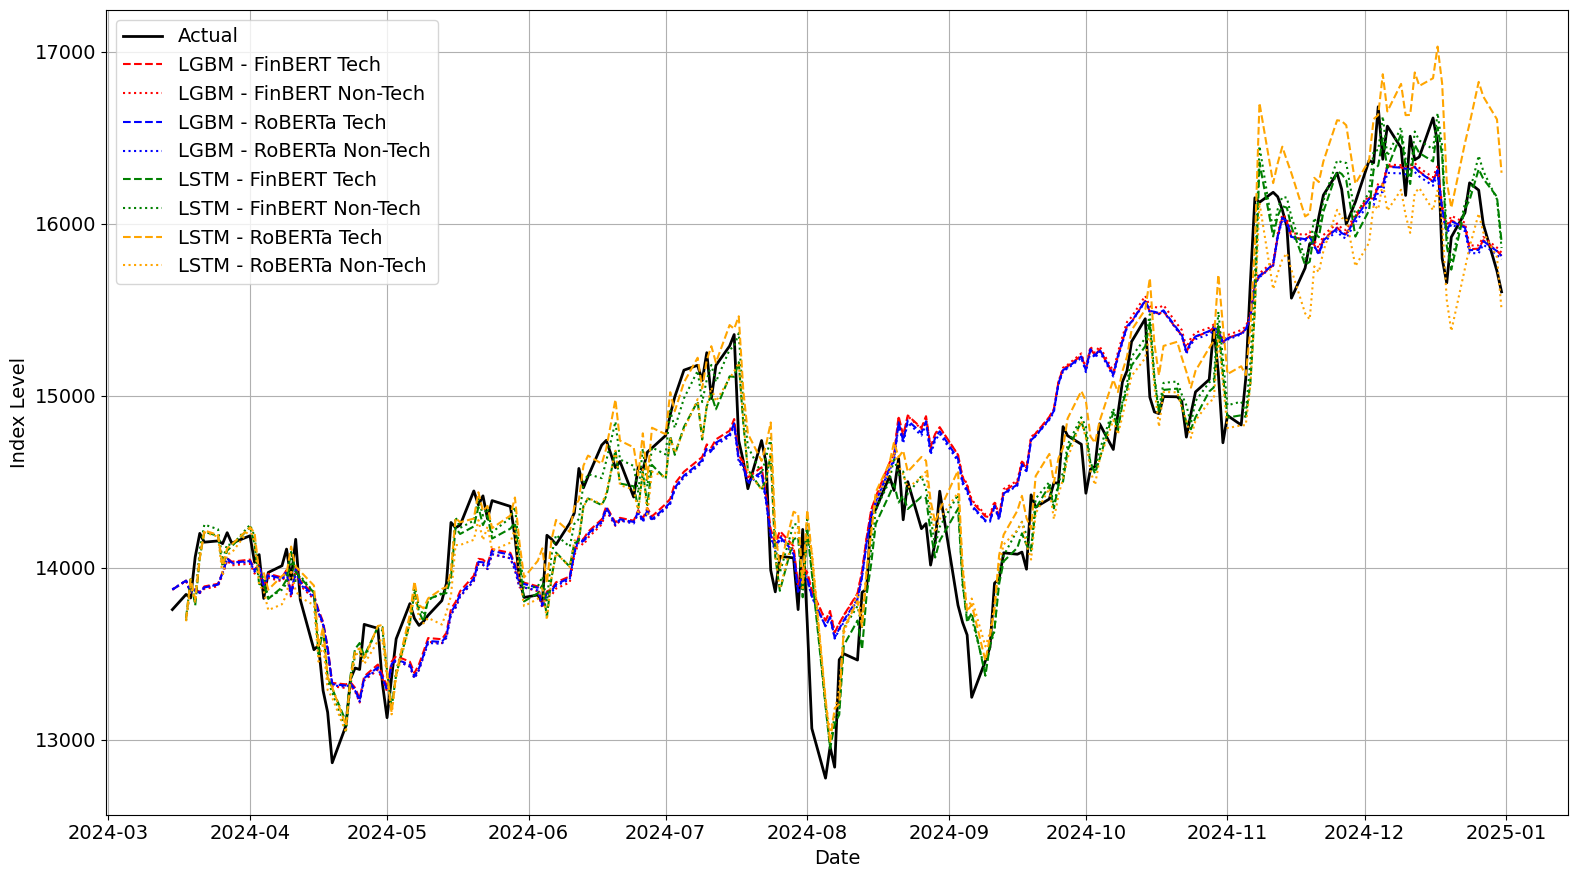

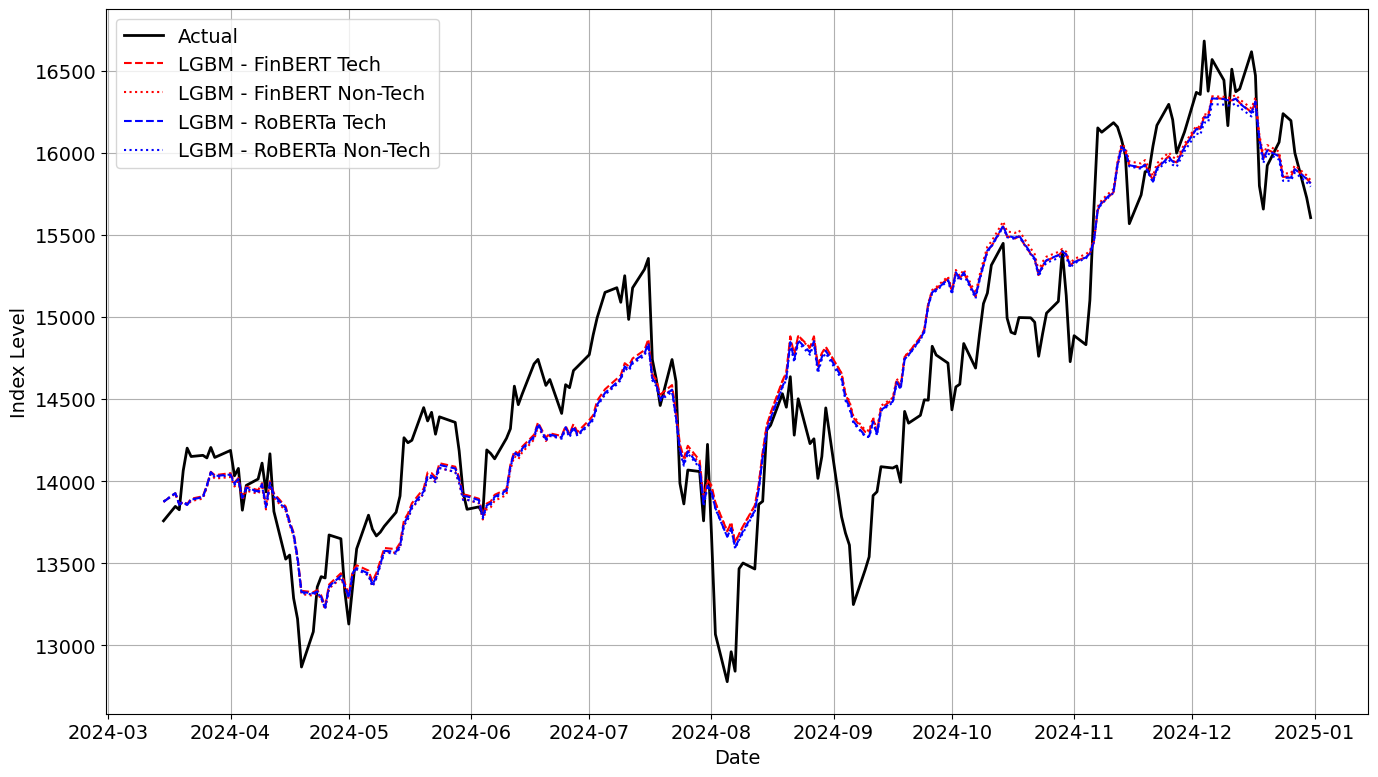

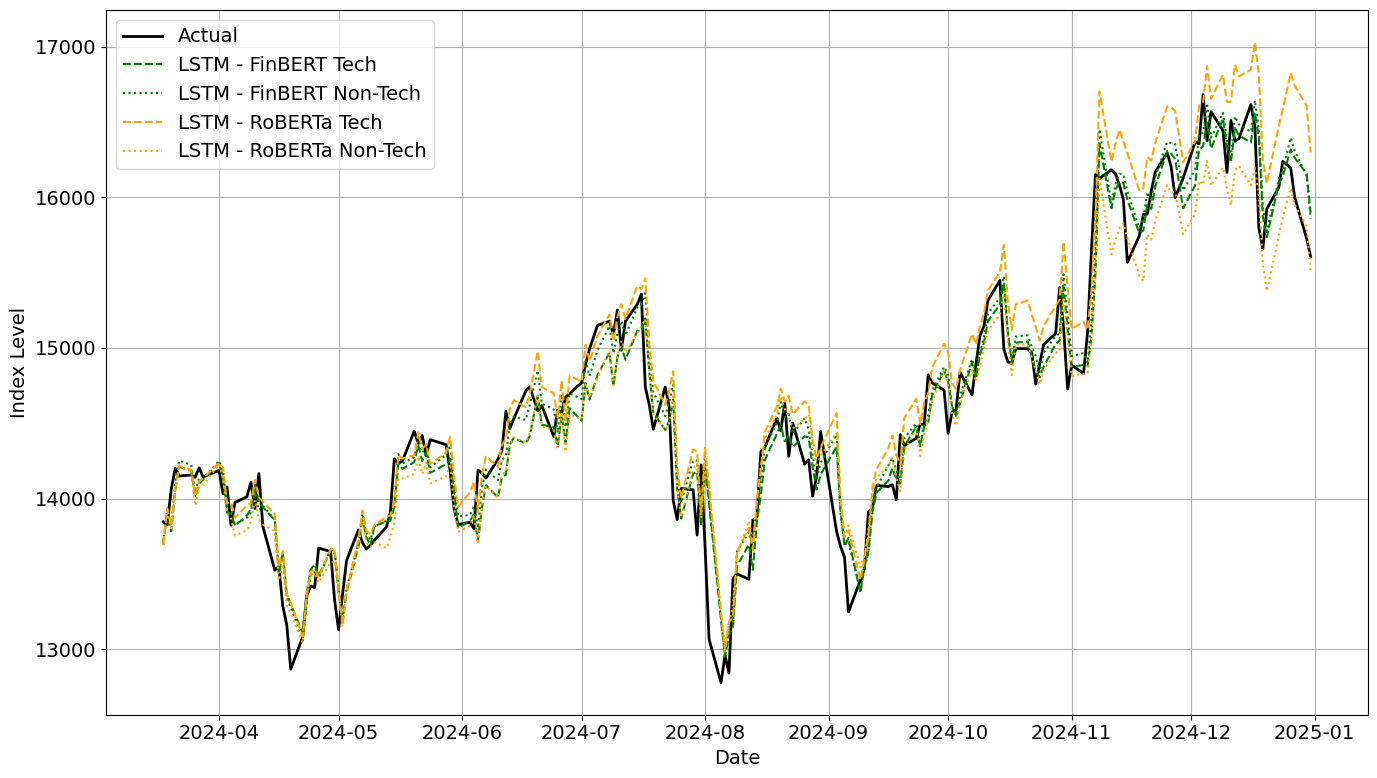

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Set global font size
plt.rcParams.update({'font.size': 14})

# Load CSVs
lgbm_tech_finbert = pd.read_csv("lgbm_index_tech_sentiment_only_finbert.csv")
lgbm_nontech_finbert = pd.read_csv("lgbm_index_non-tech_sentiment_only_finbert.csv")
lgbm_tech_roberta = pd.read_csv("lgbm_roberta_tech_index.csv")
lgbm_nontech_roberta = pd.read_csv("lgbm_roberta_non-tech_index.csv")

lstm_tech_finbert = pd.read_csv("lstm_with_tech_only_finbert_index.csv")
lstm_nontech_finbert = pd.read_csv("lstm_with_non-tech_only_finbert_index.csv")
lstm_tech_roberta = pd.read_csv("lstm_with_roberta_tech_only_index.csv")
lstm_nontech_roberta = pd.read_csv("lstm_with_roberta_non-tech_only_index.csv")

# Standardize column names and convert dates
datasets = [
    lgbm_tech_finbert, lgbm_nontech_finbert, lgbm_tech_roberta, lgbm_nontech_roberta,
    lstm_tech_finbert, lstm_nontech_finbert, lstm_tech_roberta, lstm_nontech_roberta
]

for df in datasets:
    df.rename(columns={"Date": "date", "Index_Level": "actual", "Predicted_Index_Level": "predicted"}, inplace=True)
    df["date"] = pd.to_datetime(df["date"])

# === Combined Plot: LGBM + LSTM ===
plt.figure(figsize=(16, 9))

# Actual (from any matching series)
plt.plot(lgbm_tech_finbert["date"], lgbm_tech_finbert["actual"], label="Actual", color='black', linewidth=2)

# LGBM - FinBERT (Red)
plt.plot(lgbm_tech_finbert["date"], lgbm_tech_finbert["predicted"], label="LGBM - FinBERT Tech", linestyle='--', color='red')
plt.plot(lgbm_nontech_finbert["date"], lgbm_nontech_finbert["predicted"], label="LGBM - FinBERT Non-Tech", linestyle=':', color='red')

# LGBM - RoBERTa (Blue)
plt.plot(lgbm_tech_roberta["date"], lgbm_tech_roberta["predicted"], label="LGBM - RoBERTa Tech", linestyle='--', color='blue')
plt.plot(lgbm_nontech_roberta["date"], lgbm_nontech_roberta["predicted"], label="LGBM - RoBERTa Non-Tech", linestyle=':', color='blue')

# LSTM - FinBERT (Green)
plt.plot(lstm_tech_finbert["date"], lstm_tech_finbert["predicted"], label="LSTM - FinBERT Tech", linestyle='--', color='green')
plt.plot(lstm_nontech_finbert["date"], lstm_nontech_finbert["predicted"], label="LSTM - FinBERT Non-Tech", linestyle=':', color='green')

# LSTM - RoBERTa (Orange)
plt.plot(lstm_tech_roberta["date"], lstm_tech_roberta["predicted"], label="LSTM - RoBERTa Tech", linestyle='--', color='orange')
plt.plot(lstm_nontech_roberta["date"], lstm_nontech_roberta["predicted"], label="LSTM - RoBERTa Non-Tech", linestyle=':', color='orange')

plt.xlabel("Date")
plt.ylabel("Index Level")
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("experiment 2 all.png", dpi=300)
plt.show()

# === LGBM-Only Plot ===
plt.figure(figsize=(14, 8))
plt.plot(lgbm_tech_finbert["date"], lgbm_tech_finbert["actual"], label="Actual", color='black', linewidth=2)
plt.plot(lgbm_tech_finbert["date"], lgbm_tech_finbert["predicted"], label="LGBM - FinBERT Tech", linestyle='--', color='red')
plt.plot(lgbm_nontech_finbert["date"], lgbm_nontech_finbert["predicted"], label="LGBM - FinBERT Non-Tech", linestyle=':', color='red')
plt.plot(lgbm_tech_roberta["date"], lgbm_tech_roberta["predicted"], label="LGBM - RoBERTa Tech", linestyle='--', color='blue')
plt.plot(lgbm_nontech_roberta["date"], lgbm_nontech_roberta["predicted"], label="LGBM - RoBERTa Non-Tech", linestyle=':', color='blue')
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("lgbm_experiment2.png", dpi=300)
plt.show()

# === LSTM-Only Plot ===
plt.figure(figsize=(14, 8))
plt.plot(lstm_tech_finbert["date"], lstm_tech_finbert["actual"], label="Actual", color='black', linewidth=2)
plt.plot(lstm_tech_finbert["date"], lstm_tech_finbert["predicted"], label="LSTM - FinBERT Tech", linestyle='--', color='green')
plt.plot(lstm_nontech_finbert["date"], lstm_nontech_finbert["predicted"], label="LSTM - FinBERT Non-Tech", linestyle=':', color='green')
plt.plot(lstm_tech_roberta["date"], lstm_tech_roberta["predicted"], label="LSTM - RoBERTa Tech", linestyle='--', color='orange')
plt.plot(lstm_nontech_roberta["date"], lstm_nontech_roberta["predicted"], label="LSTM - RoBERTa Non-Tech", linestyle=':', color='orange')
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("lstm_experiment2.png", dpi=300)
plt.show()


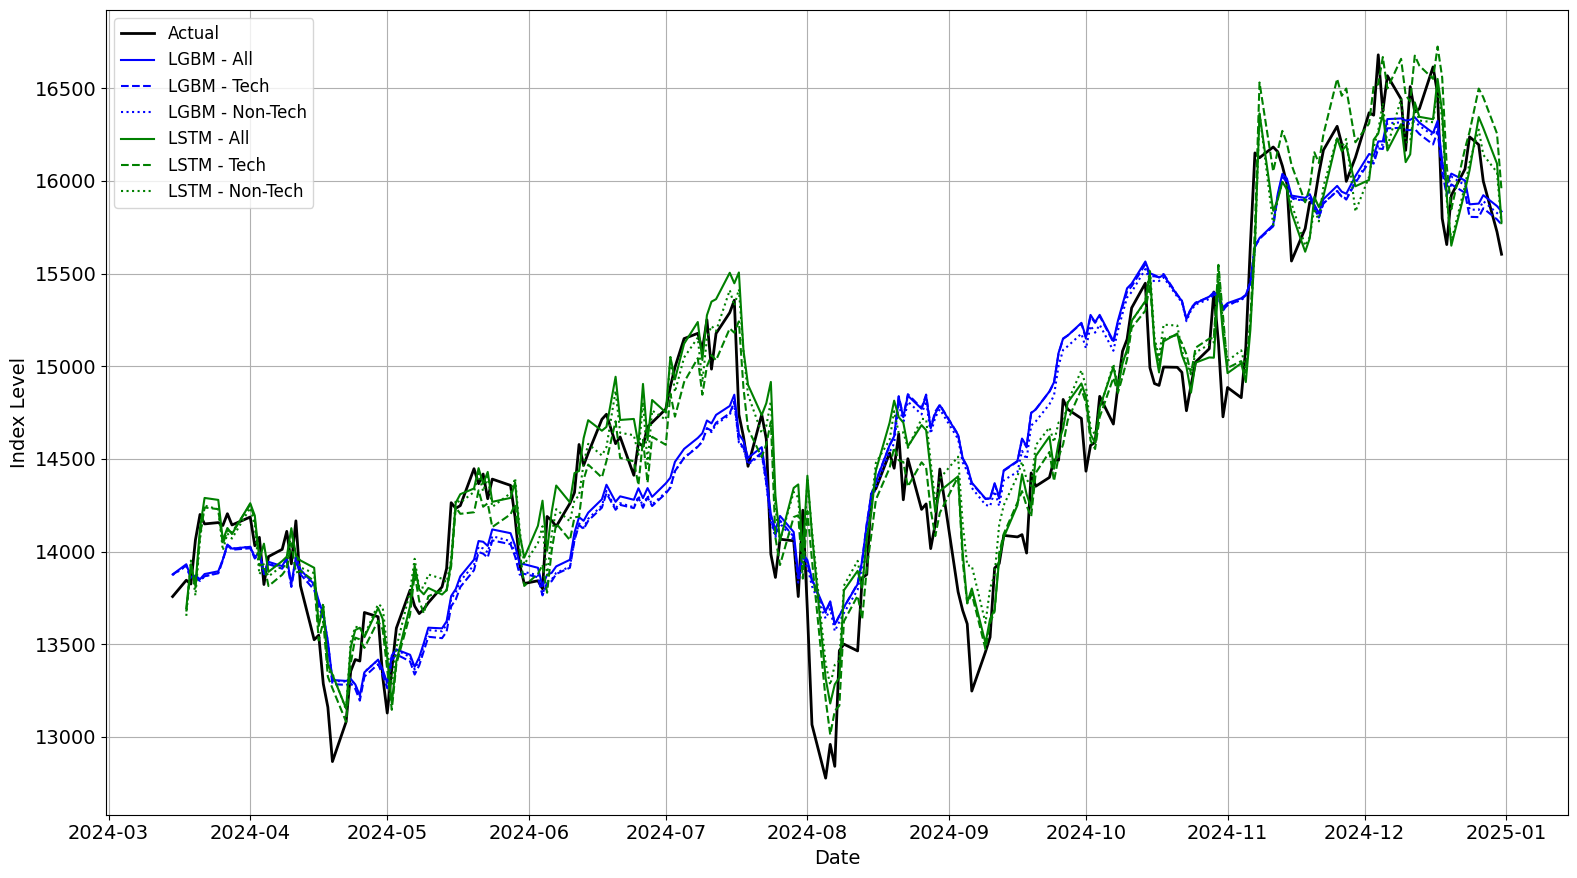

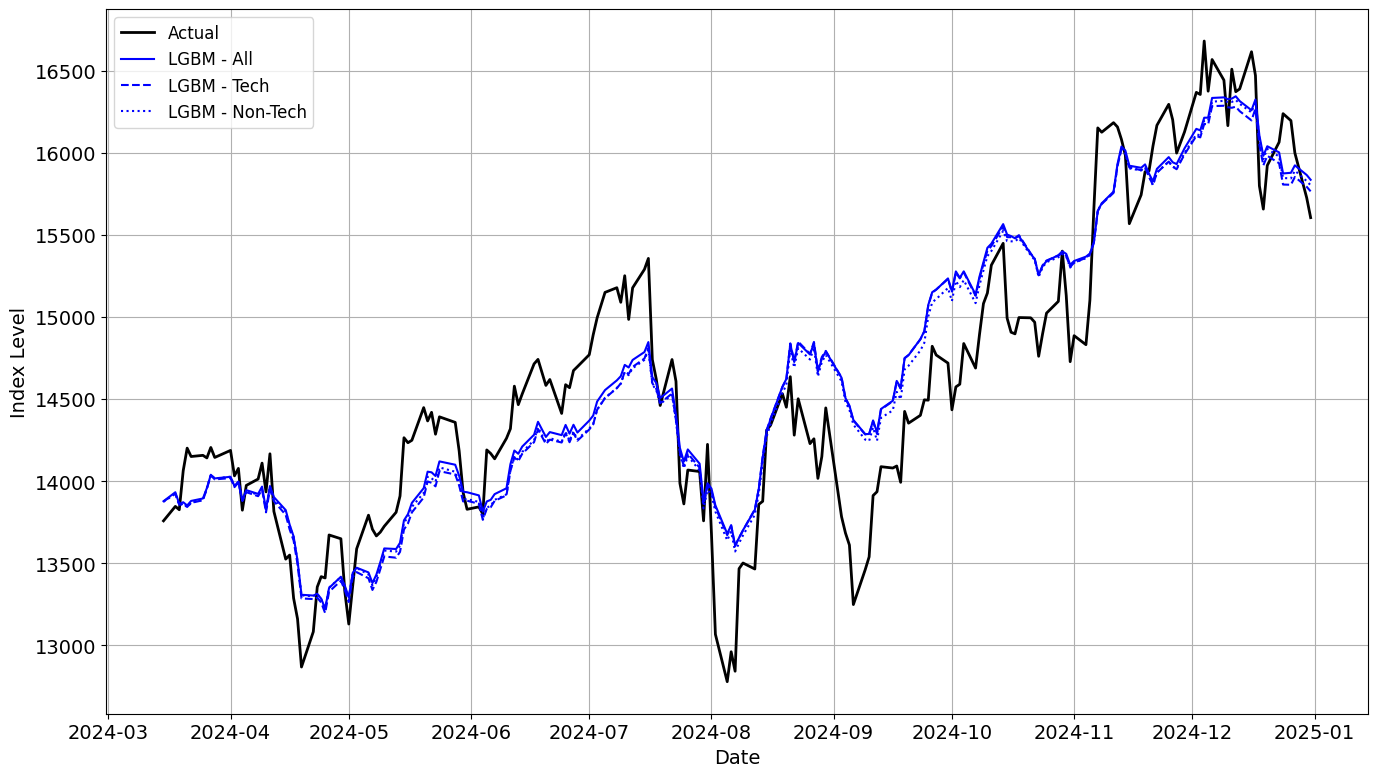

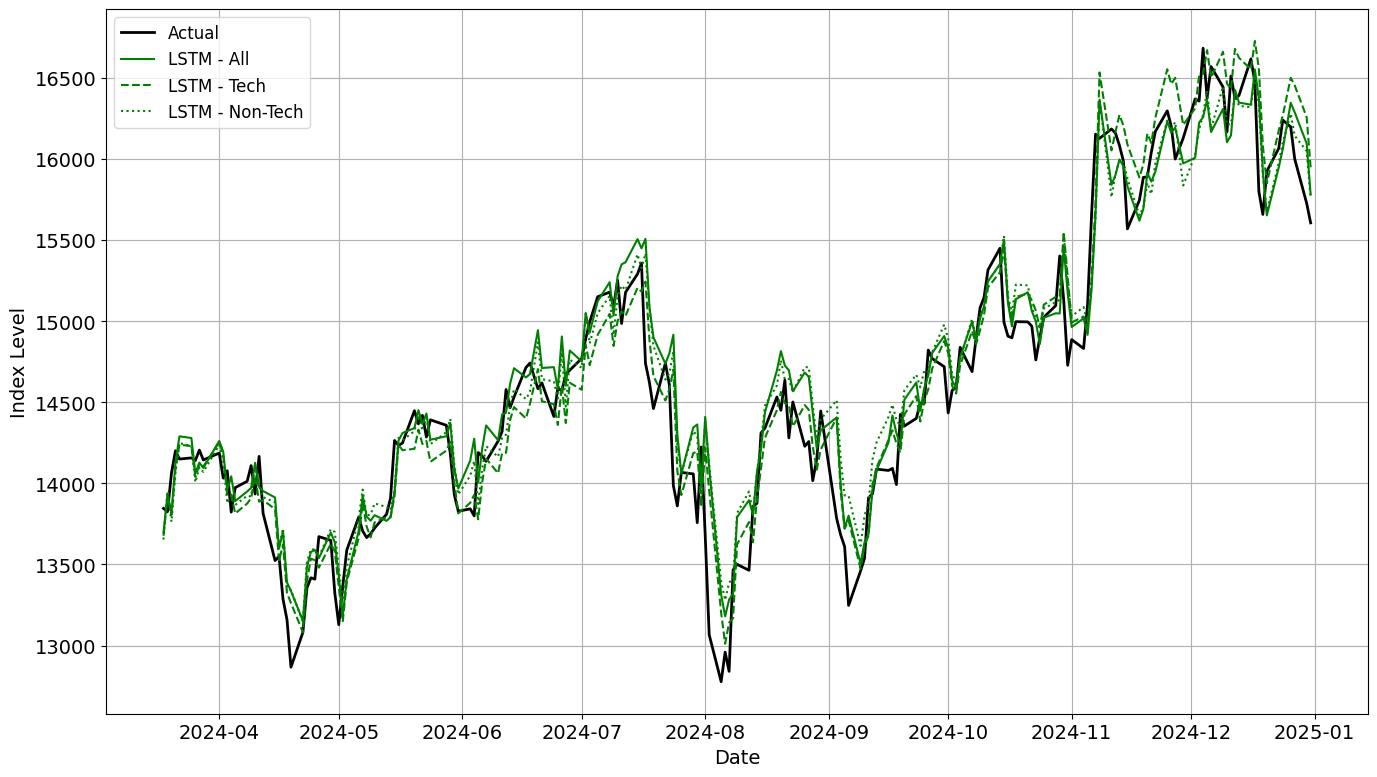

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Set global font size
plt.rcParams.update({'font.size': 14})

# Load CSVs
lgbm_all = pd.read_csv("lgbm_finetuned_finbert_index.csv")
lgbm_nontech = pd.read_csv("lgbm_finetuned_finbert_non-tech_index.csv")
lgbm_tech = pd.read_csv("lgbm_finetuned_finbert_tech_index.csv")

lstm_all = pd.read_csv("lstm_with_finetuned_finbert_index.csv")
lstm_nontech = pd.read_csv("lstm_with_finetuned_non-tech_only_index.csv")
lstm_tech = pd.read_csv("lstm_with_finetuned_tech_only_index.csv")

# Standardize column names and convert dates
datasets = [lgbm_all, lgbm_nontech, lgbm_tech, lstm_all, lstm_nontech, lstm_tech]
for df in datasets:
    df.rename(columns={
        "Date": "date",
        "Index_Level": "actual",
        "Predicted_Index_Level": "predicted"
    }, inplace=True)
    df["date"] = pd.to_datetime(df["date"])

# === Combined Plot: LSTM vs LGBM across All / Tech / Non-Tech ===
plt.figure(figsize=(16, 9))

# Actual
plt.plot(lgbm_all["date"], lgbm_all["actual"], label="Actual", color='black', linewidth=2)

# LGBM (Blue)
plt.plot(lgbm_all["date"], lgbm_all["predicted"], label="LGBM - All", linestyle='-', color='blue')
plt.plot(lgbm_tech["date"], lgbm_tech["predicted"], label="LGBM - Tech", linestyle='--', color='blue')
plt.plot(lgbm_nontech["date"], lgbm_nontech["predicted"], label="LGBM - Non-Tech", linestyle=':', color='blue')

# LSTM (Green)
plt.plot(lstm_all["date"], lstm_all["predicted"], label="LSTM - All", linestyle='-', color='green')
plt.plot(lstm_tech["date"], lstm_tech["predicted"], label="LSTM - Tech", linestyle='--', color='green')
plt.plot(lstm_nontech["date"], lstm_nontech["predicted"], label="LSTM - Non-Tech", linestyle=':', color='green')

plt.xlabel("Date")
plt.ylabel("Index Level")
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("experiment 3 all.png", dpi=300)
plt.show()

# === LGBM Only Plot ===
plt.figure(figsize=(14, 8))
plt.plot(lgbm_all["date"], lgbm_all["actual"], label="Actual", color='black', linewidth=2)
plt.plot(lgbm_all["date"], lgbm_all["predicted"], label="LGBM - All", linestyle='-', color='blue')
plt.plot(lgbm_tech["date"], lgbm_tech["predicted"], label="LGBM - Tech", linestyle='--', color='blue')
plt.plot(lgbm_nontech["date"], lgbm_nontech["predicted"], label="LGBM - Non-Tech", linestyle=':', color='blue')
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("lgbm experiment 3.png", dpi=300)
plt.show()

# === LSTM Only Plot ===
plt.figure(figsize=(14, 8))
plt.plot(lstm_all["date"], lstm_all["actual"], label="Actual", color='black', linewidth=2)
plt.plot(lstm_all["date"], lstm_all["predicted"], label="LSTM - All", linestyle='-', color='green')
plt.plot(lstm_tech["date"], lstm_tech["predicted"], label="LSTM - Tech", linestyle='--', color='green')
plt.plot(lstm_nontech["date"], lstm_nontech["predicted"], label="LSTM - Non-Tech", linestyle=':', color='green')
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("lstm experiment 3.png", dpi=300)
plt.show()
